In [1]:
from utilities import MotifWrapper, MuscleAlignWrapper, Weblogo
from IPython.display import Image, display
import numpy as np

In [2]:
# motives as list of lists - sample output from meme_wrapper

motives = [
    #Motif 1
    [('male', 'TGTAACAGAGATCACACAA'),
     ('ompa', 'CCTGACGGAGTTCACACTT'),
     ('lac', 'TGTGAGTTAGCTCACTCAT'),
     ('tdc', 'TGTGAGTGGTCGCACATAT'),
     ('pbr322', 'TGTGAAATACCGCACAGAT'),
     ('tnaa', 'TGTGATTCGATTCACATTT'),
     ('deop2', 'TTTGAACCAGATCGCATTA'),
     ('ce1cg', 'TTTGATCGTTTTCACAAAA'),
     ('ara', 'TTTGCACGGCGTCACACTT'),
     ('bglr1', 'TGTGAGCATGGTCATATTT'),
     ('crp', 'TGCAAAGGACGTCACATTA'),
     ('malt', 'TGTGACACAGTGCAAATTC'),
     ('gale', 'TGTAAACGATTCCACTAAT'),
     ('cya', 'TGTTAAATTGATCACGTTT'),
     ('uxu1', 'TGTGATGTGGTTAACCCAA'),
     ('ilv', 'CGTGATCAACCCCTCAATT'),
     ('gale', 'TGTCACACTTTTCGCATCT'),
     ('malk', 'CGTGATGTTGCTTGCAAAA')],
    
    #Motif 2
    [('pbr322', 'GGAGAAAATACCGC'),
     ('ce1cg', 'GGCGAGAATAGCGC'),
     ('gale', 'GCATAAAAAACGGC'),
     ('malk', 'GATGAGAACACGGC'),
     ('ara', 'GCAGAAAAGTCCAC'),
     ('trn9cat', 'GGCGAAAATGAGAC')],
    
    #Motif3
    [('lac', 'CCCCAGGCTTTACA'), 
     ('ce1cg', 'CCACAGTCTTGACA')]]

<h3>Stand-alone example of WebLogo wrapper</h3>

In [3]:
logos=[]
wb = Weblogo(output_format = 'png',    #[eps, png, png_print, jpeg]
             stacks_per_line = 40,
             sequence_type = 'dna',    #[protein, dna, rna]
             ignore_lower_case = False,
             units = 'bits',    #['bits', 'nats', 'digits', 'kT', 'kJ/mol', 'kcal/mol', 'probability']
             first_position = 1,
             #logo_range = list(),
             scale_stack_widths = True,
             error_bars = True,
             title = '',
             figure_label = '',
             show_x_axis = True,
             x_label = '',
             show_y_axis = True,
             y_label = '',
             y_axis_tic_spacing = 1.0,
             show_ends = False,
             color_scheme = 'classic', #[auto, base, pairing, charge, chemistry, classic, monochrome]
             resolution = 200,
             fineprint = ' ',
            )

for i in range(len(motives)):
    logo_image = wb.create_logo(seqs=motives[i])
    logos.append(logo_image)

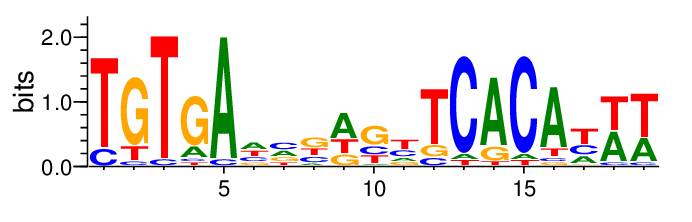

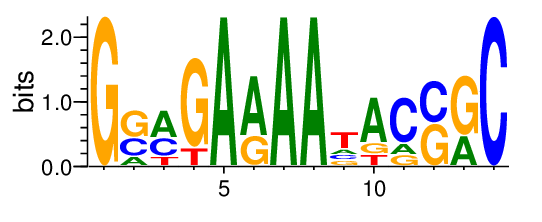

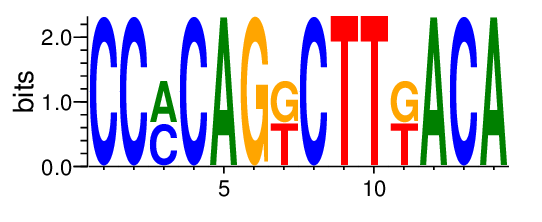

In [4]:
for i in range(len(motives)):
    display(Image(logos[i]))

<h3>Stand-alone example of Muscle wrapper</h3>

In [5]:
aligned_motives=[]
ma = MuscleAlignWrapper(diags=False, 
                         maxiters = 16, 
                         maxhours = None,
                        )

for i in range(len(motives)):
    aligned_motives.append( ma.transform(seqs=motives[i]) )

In [6]:
for i in range(len(motives)):
    print 'Motif %d:'%(i+1)
    for am in aligned_motives[i]: print am
    print

Motif 1:
('male', 'TGTAACAGAGATCACACAA')
('ompa', 'CCTGACGGAGTTCACACTT')
('lac', 'TGTGAGTTAGCTCACTCAT')
('tdc', 'TGTGAGTGGTCGCACATAT')
('pbr322', 'TGTGAAATACCGCACAGAT')
('tnaa', 'TGTGATTCGATTCACATTT')
('deop2', 'TTTGAACCAGATCGCATTA')
('ce1cg', 'TTTGATCGTTTTCACAAAA')
('ara', 'TTTGCACGGCGTCACACTT')
('bglr1', 'TGTGAGCATGGTCATATTT')
('crp', 'TGCAAAGGACGTCACATTA')
('malt', 'TGTGACACAGTGCAAATTC')
('gale', 'TGTAAACGATTCCACTAAT')
('cya', 'TGTTAAATTGATCACGTTT')
('uxu1', 'TGTGATGTGGTTAACCCAA')
('ilv', 'CGTGATCAACCCCTCAATT')
('gale', 'TGTCACACTTTTCGCATCT')
('malk', 'CGTGATGTTGCTTGCAAAA')

Motif 2:
('pbr322', 'GGAGAAAATACCGC')
('ce1cg', 'GGCGAGAATAGCGC')
('gale', 'GCATAAAAAACGGC')
('malk', 'GATGAGAACACGGC')
('ara', 'GCAGAAAAGTCCAC')
('trn9cat', 'GGCGAAAATGAGAC')

Motif 3:
('lac', 'CCCCAGGCTTTACA')
('ce1cg', 'CCACAGTCTTGACA')



<h3>PWM Example</h3>

In [7]:
pwm1 = MotifWrapper(alphabet='dna', 
                    pseudocounts={'-':0,
                                  'A':1,
                                  'C':1,
                                  'G':1,
                                  'T':1,
                                 })
pwm1.fit(motives)

pwm1.display()

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18
-:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
A:   0.05   0.05   0.05   0.18   0.82   0.32   0.27   0.14   0.45   0.09   0.18   0.05   0.09   0.68   0.09   0.68   0.23   0.41   0.32
C:   0.18   0.09   0.09   0.09   0.09   0.23   0.32   0.23   0.05   0.23   0.27   0.14   0.77   0.05   0.77   0.09   0.27   0.09   0.09
G:   0.05   0.68   0.05   0.64   0.05   0.18   0.23   0.36   0.23   0.45   0.18   0.18   0.05   0.18   0.05   0.09   0.09   0.05   0.05
T:   0.73   0.18   0.82   0.09   0.05   0.27   0.18   0.27   0.27   0.23   0.36   0.64   0.09   0.09   0.09   0.14   0.41   0.45   0.55

        0      1      2      3      4      5      6      7      8      9     10     11     12     13
-:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

In [8]:
pwm1.matrix(motif_num=1)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.04545455,  0.04545455,  0.04545455,  0.18181818,  0.81818182,
         0.31818182,  0.27272727,  0.13636364,  0.45454545,  0.09090909,
         0.18181818,  0.04545455,  0.09090909,  0.68181818,  0.09090909,
         0.68181818,  0.22727273,  0.40909091,  0.31818182],
       [ 0.18181818,  0.09090909,  0.09090909,  0.09090909,  0.09090909,
         0.22727273,  0.31818182,  0.22727273,  0.04545455,  0.22727273,
         0.27272727,  0.13636364,  0.77272727,  0.04545455,  0.77272727,
         0.09090909,  0.27272727,  0.09090909,  0.09090909],
       [ 0.04545455,  0.68181818,  0.04545455,  0.63636364,  0.04545455,
         0.18181818,  0.22727273,  0.36363636,  0.22727273,  0.45454545,
         0.181

In [12]:
test_seq = 'GGAGAAAATACCGC' * 10    # 140 characters
seq_score = pwm1.score(motif_num=2, seq=test_seq)
print [ i > 1.0e-08 for i in seq_score]

[True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True]
